# Ejercicio final del módulo 2

El punto de partida es la consideración de que existe un gran problema con la vivienda y el turismo de alquiler de AirBnb en ciudades. Vamos a trabajar con un `dataset` para analizar este problema. 

Se sabe que muchos propietarios privados encuentran más rentable y lucrativo alquilar pisos a turistas que a locales (especialmente en los centros de las ciudades), y muchas agencias inmobiliarias compran propiedades y las convierten también en alojamientos turísticos. Todo esto tiene como efecto reducir la oferta, aumentar los precios y empujar a los comercios locales a otros barrios, dejando solo a los turistas en el centro.

Con esto en mente, y sabiendo que Airbnb es hoy en día uno de los mercados en línea más populares para alojamiento, investigaremos los datos para:

- Por un lado evaluar el impacto que tiene Airbnb en la vivienda (en este caso se analiza la ciudad de Madrid).

- Por otro lado indagar sobre quién, cuándo y cómo se alquila y posiblemente hacer consideraciones sobre los flujos turísticos.

# Importar librerias

Pandas, numpy y seaborn

## Solución

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Cargar los anuncios de AirBnb

## Solución

In [2]:
df= pd.read_csv("airbnb_anuncios.csv")

# Vea el contenido del dataset y analice las columnas

No siempre tendremos una descripción de las columnas. Analícelas con los siguientes comandos: `shape`, `dtypes` e `info`.

## Solución

In [3]:
df.shape

(20837, 16)

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

# Valores duplicados

Analice  los valores duplicados por las columnas.

Use el comando `duplicated` junto con `sum`.

En esta ocasión quite los valores duplicados con `drop_duplicates`.

## Solución

In [6]:
df.duplicated().sum()

0

# Compruebe los valores nulos

Para ello use `isnull` junto con `sum`.

## Solución

In [7]:
df.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

# Limpieza de columnas

Elimine las columnas `nombre`, `id`, `host_name` y `last_review`.

## Solución

In [8]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room with ensuite bathroom, Airc.",13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,2019-09-04,0.56,1,53


no dropeo host_name ya que lo voy a usar 

In [9]:
df.drop(["name","id","last_review"], axis= 1, inplace=True)


In [10]:
df.head(1)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53


# Análisis de los barrios

Analice la columna `neighbourhood_group` y contee los valores. Use el parámetro `normalize` con valores `True` o `False` para ver su utilidad.

Link de referencia: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

## Solución

In [11]:
df["neighbourhood_group"].value_counts(normalize=True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

# Tratamiento de la columna `reviews_per_month`

Ponga a 0 aquellos valores nulos de la columna con el comando `fillna`.

## Solución

In [12]:
df["reviews_per_month"].isnull().sum()

4654

In [13]:
df["reviews_per_month"].fillna(0, inplace=True)

In [14]:
df["reviews_per_month"].isnull().sum()

0

In [15]:
df["host_name"].fillna("sin nombre", inplace=True)

# Quite aquellos valores nulos de las columnas restantes


## Solución

In [16]:
df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   host_name                       20837 non-null  object 
 2   neighbourhood_group             20837 non-null  object 
 3   neighbourhood                   20837 non-null  object 
 4   latitude                        20837 non-null  float64
 5   longitude                       20837 non-null  float64
 6   room_type                       20837 non-null  object 
 7   price                           20837 non-null  int64  
 8   minimum_nights                  20837 non-null  int64  
 9   number_of_reviews               20837 non-null  int64  
 10  reviews_per_month               20837 non-null  float64
 11  calculated_host_listings_count  20837 non-null  int64  
 12  availability_365                

# Uee el comando `describe` para ver el estado de los datos



## Solución

In [18]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


# Analice la correlación de las variables

Use el comando `corr` y de Seaborn use `heatmap` para respresentarlo.

Importe la librería `matplotlib` para facilitar la representación de los futuros gráficos.

`import matplotlib.pyplot as plt`

 **¿Qué observa con las correlaciones?**

In [19]:
import matplotlib.pyplot as plt

In [20]:
#para sacar los warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Solución

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

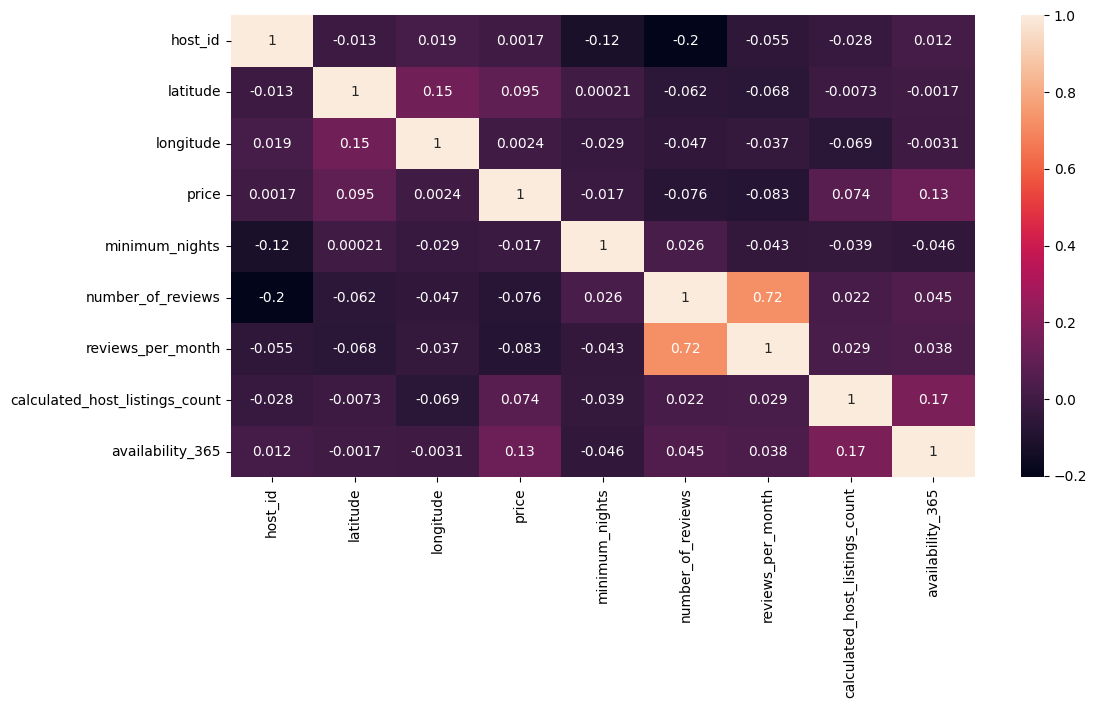

In [21]:
corr = df.corr(method='kendall')
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)
df.columns


# Identifique los barrios del dataset

Use el comando `unique` en la columna `neighbourhood_group`.

## Solución

In [22]:
df["neighbourhood_group"].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

# Represente los barrios y su importancia

Use `countplot` de `Seaborn` en la columna `neighbourhood_group`.

## Solución

Text(0.5, 1.0, 'Columna: neighbourhood_group')

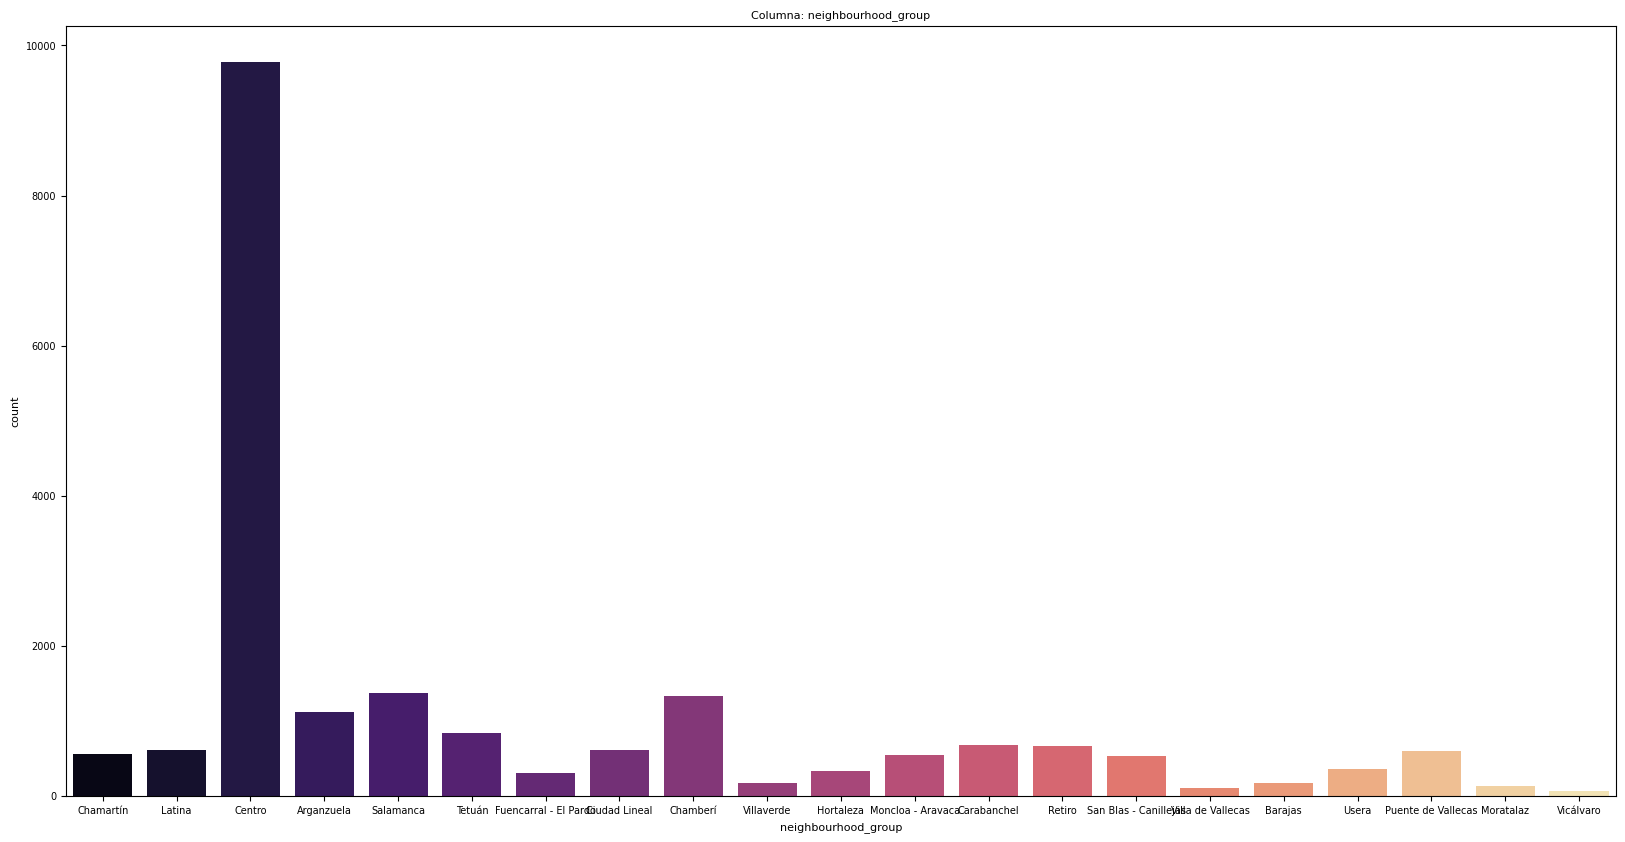

In [24]:
plt.figure(figsize =(20, 10))
ax= sns.countplot(x ="neighbourhood_group",data = df, palette="magma")
# o sns.countplot(x= df["neighbourhood_group"])
plt.xlabel("neighbourhood_group",fontsize=8)
plt.ylabel("count", fontsize=8)
#to increase y ticks size
plt.yticks(size=7)
#to increase x ticks 
plt.xticks(size=7)
ax.set_title('Columna: neighbourhood_group', fontsize = 8)



# Realice ahora una representación de los barrios por separado y sin agrupar.

Use `countplot` de `Seaborn` en la columna `neighbourhood`.

## Solución

In [25]:
from matplotlib.pyplot import yticks

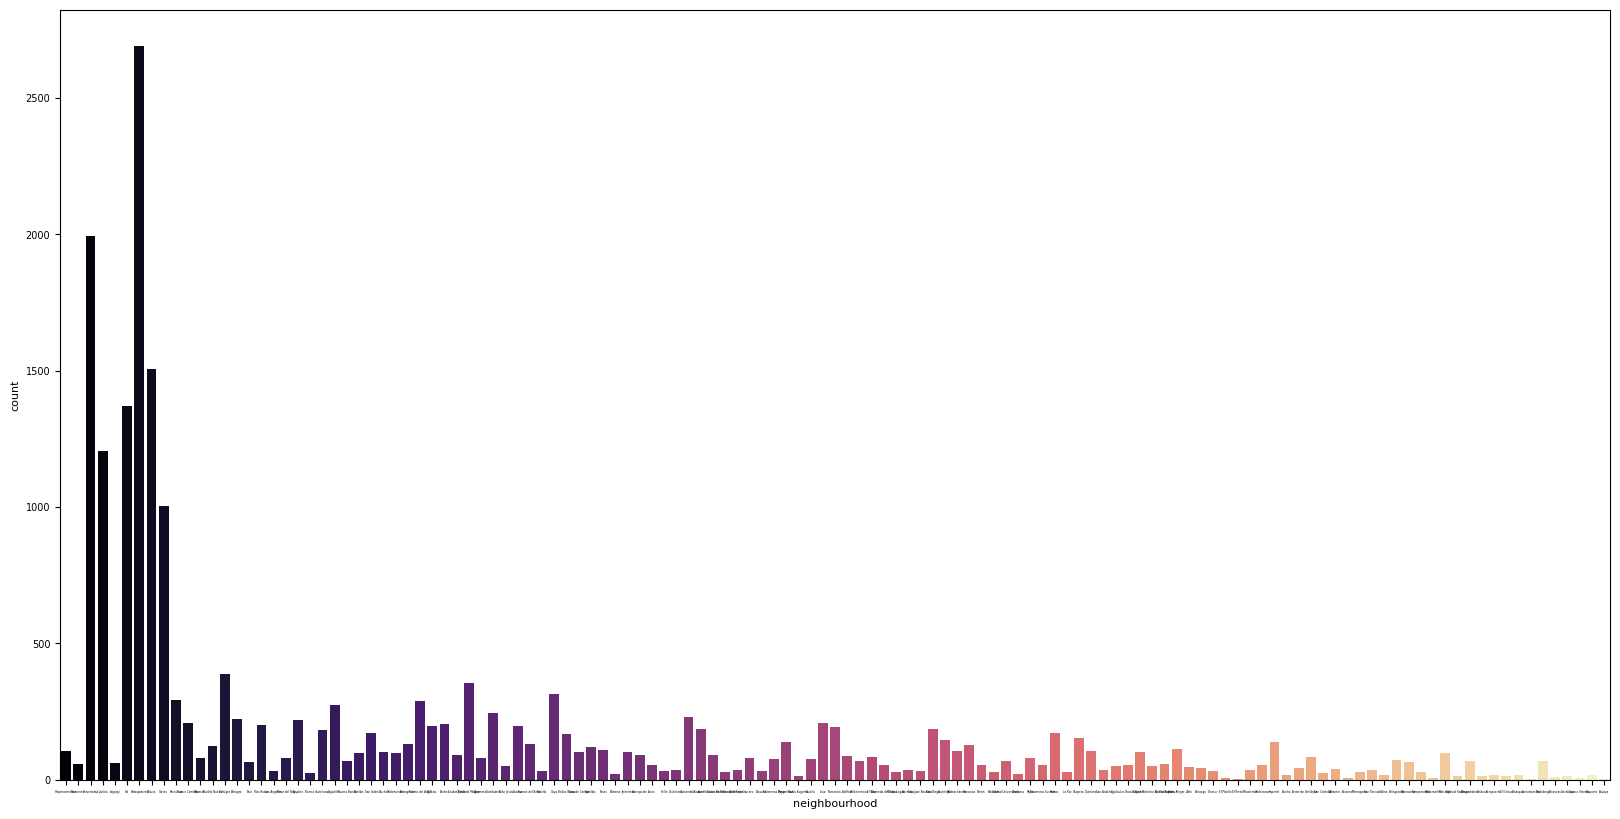

In [26]:
plt.figure(figsize =(20, 10))
plt.xlabel("neighbourhood",fontsize=8)
plt.ylabel("count", fontsize=8)
#to increase y ticks size
plt.yticks(size=7)
#to increase x ticks 
plt.xticks(size=2)
ax= sns.countplot(x ="neighbourhood",data = df, palette="magma")

# Represente los tipos de habitación que se ofertan

Use la columna `room_type`.

## Solución

Text(0.5, 1.0, 'Tipos de habitaciones mas ofertadas')

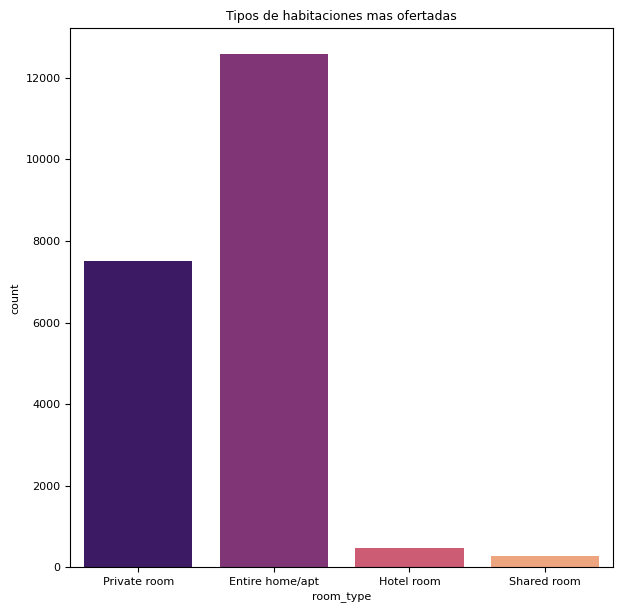

In [27]:
plt.figure(figsize =(7, 7))
plt.xlabel("room_type",fontsize=8)
plt.ylabel("count", fontsize=8)
#to increase y ticks size
plt.yticks(size=8)
#to increase x ticks 
plt.xticks(size=8)
ax=sns.countplot(x="room_type",data=df,palette="magma")
ax.set_title("Tipos de habitaciones mas ofertadas", fontsize=9)


# Relación entre la columna `neighbour_group` y `availability_365` que corresponde a la disponiblidad

Puede usar un `boxplot` de `sns`.
**¿Qué interpreta?**

## Solución

<AxesSubplot: xlabel='neighbourhood_group', ylabel='availability_365'>

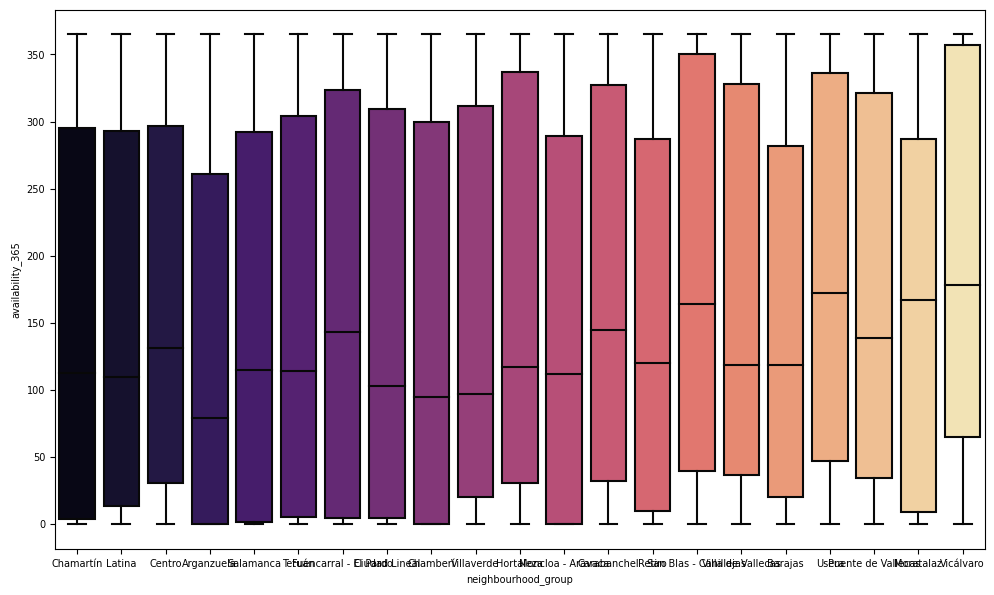

In [28]:
plt.figure(figsize =(12, 7))
plt.xlabel("neighbourhood_group",fontsize=7)
plt.ylabel("availability_365", fontsize=7)
plt.yticks(size=7)
plt.xticks(size=7)
sns.boxplot(data= df, x="neighbourhood_group", y="availability_365", palette="magma")

# Relicemos un mapa de los grupos de barrios

Use un `scatterplot` de `sns`.

Para ello deberá aportar las columnas `longitude`, `latitude` y como `hue` aporte la columna `neighbourhood_group`.

Link de referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Solución

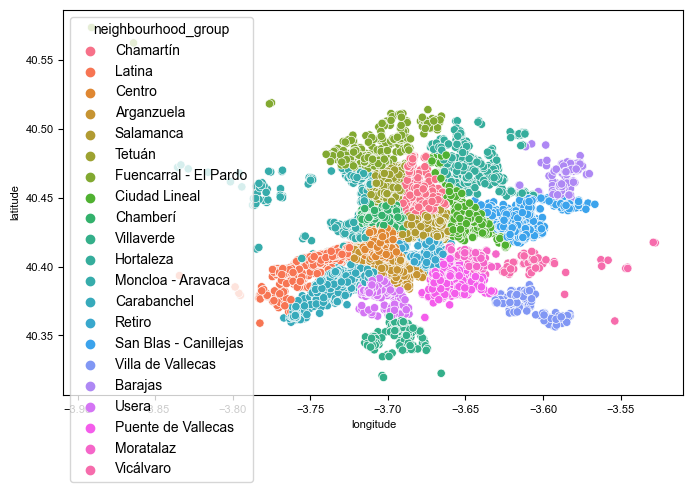

In [29]:
plt.figure(figsize=(8,5))
plt.xlabel("longitude",fontsize=8)
plt.ylabel("latitude", fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
sns.scatterplot(data= df, x= "longitude", y="latitude", hue="neighbourhood_group")

#increase font size of all elements
sns.set(font_scale=0.6)

# Realice el mapa anterior pero esta vez de los barrios

Siguiendo el comando anterior, use la columna `neighbourhood`.

## Solución

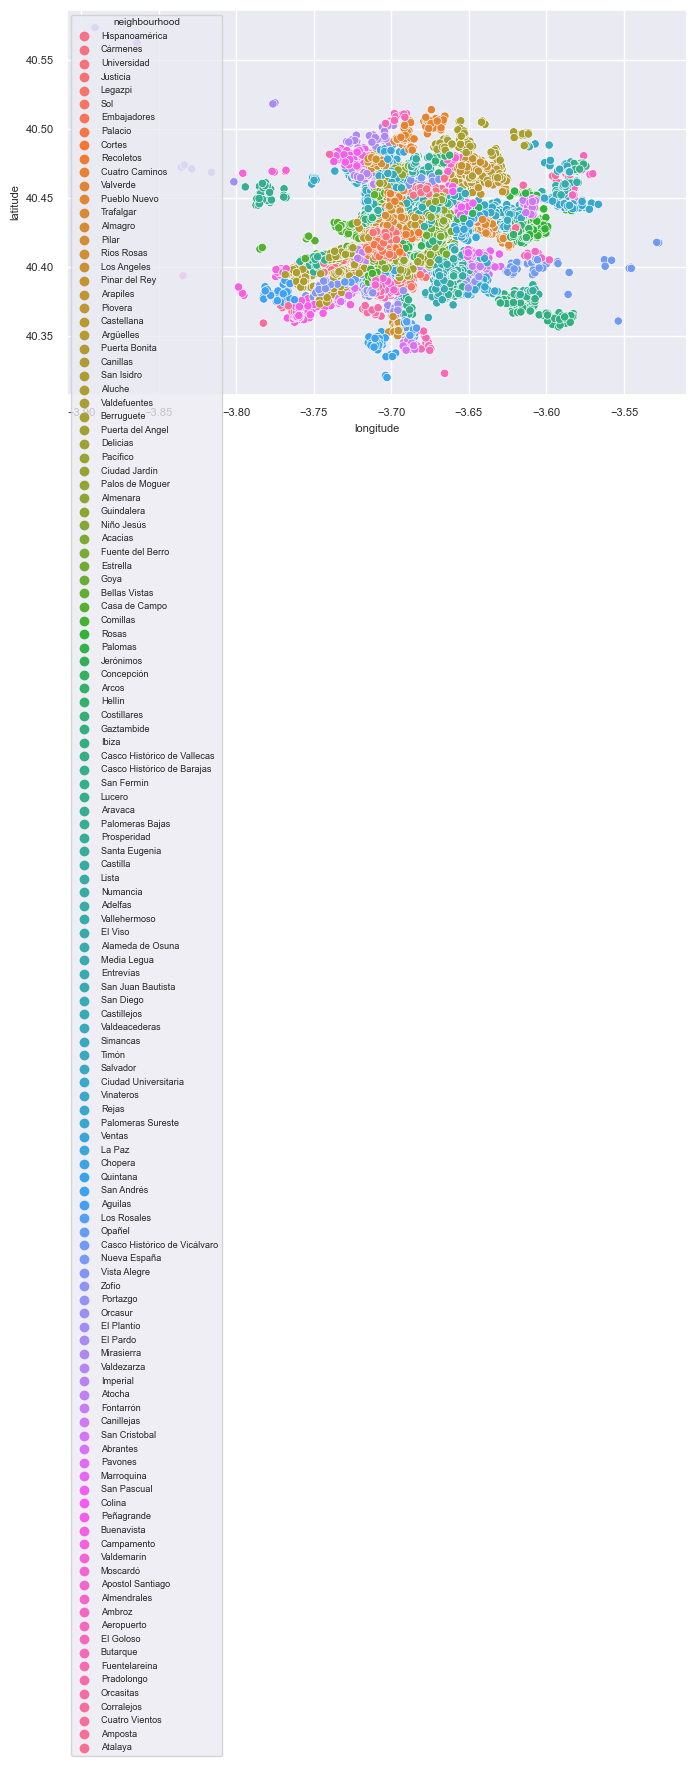

In [30]:
plt.figure(figsize=(8,5))
plt.xlabel("longitude",fontsize=8)
plt.ylabel("latitude", fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
sns.scatterplot(data= df, x= "longitude", y="latitude", hue="neighbourhood")

#increase font size of all elements
sns.set(font_scale=0.6)

# Cree un mapa sobre el tipo de habitación por barrios

Esta vez, use la columna `room_type`.

**¿Qué indica el gráfico?**

In [ ]:
# Que los roomtype estan concentrados en entire home/apt y en private room

## Solución

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

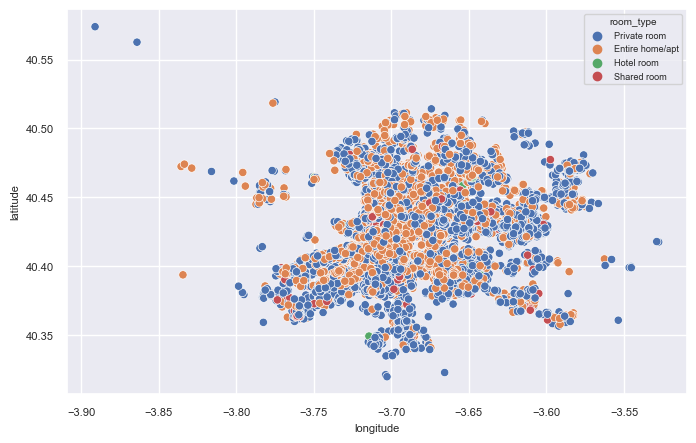

In [31]:
plt.figure(figsize=(8,5))
plt.xlabel("longitude",fontsize=8)
plt.ylabel("latitude", fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
sns.scatterplot(data= df, x= "longitude", y="latitude", hue="room_type")


# Disponibilidad de las habitaciones

Cree un mapa para ver la disponibilidad de las habitaciones. 

Para ello use la columna `availability_365`.

## Solución

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

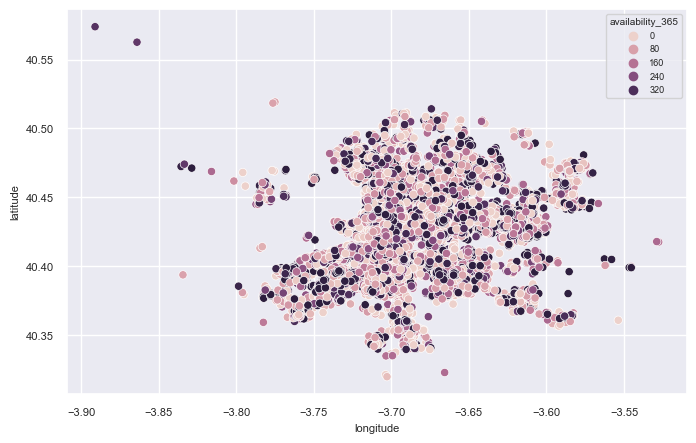

In [32]:
plt.figure(figsize=(8,5))
plt.xlabel("longitude",fontsize=8)
plt.ylabel("latitude", fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
sns.scatterplot(data= df, x= "longitude", y="latitude", hue="availability_365")


## Personalización

In [33]:
import plotly.express as px

Precios por barrios

### Distribución de las variables

1.1 Precio


C:\Users\fara1\AppData\Local\Temp\ipykernel_5576\1983112514.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["price"]*10000)


<AxesSubplot: xlabel='price', ylabel='Density'>

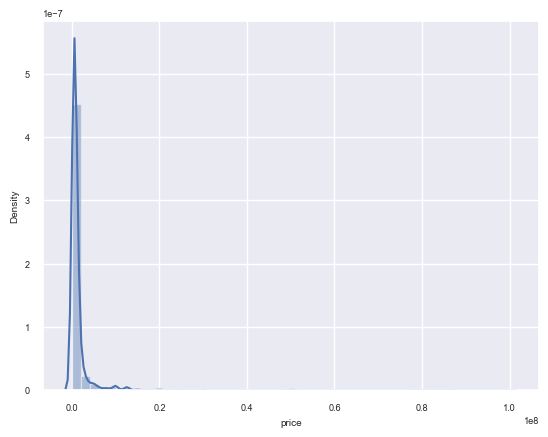

In [34]:
sns.distplot(df["price"]*10000)

1.2 Noche mínima

C:\Users\fara1\AppData\Local\Temp\ipykernel_5576\866192648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["minimum_nights"]*10000, kde=True)


<AxesSubplot: xlabel='minimum_nights', ylabel='Density'>

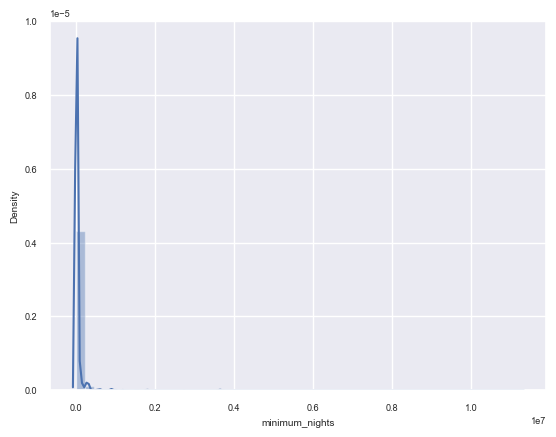

In [35]:
sns.distplot(df["minimum_nights"]*10000, kde=True)

1.3 Disponibilidad

C:\Users\fara1\AppData\Local\Temp\ipykernel_5576\1603039620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["availability_365"])


<AxesSubplot: xlabel='availability_365', ylabel='Density'>

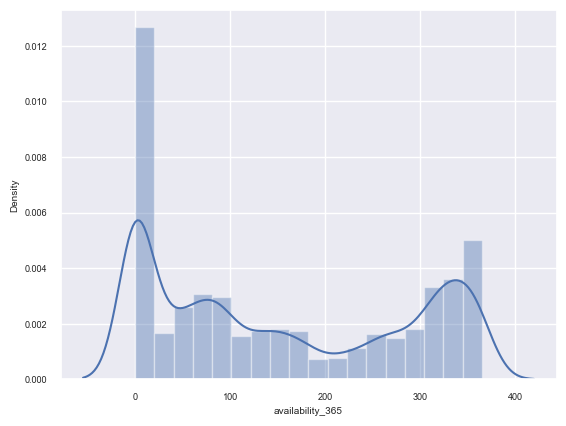

In [36]:
sns.distplot(df["availability_365"])

### Outliers Precio

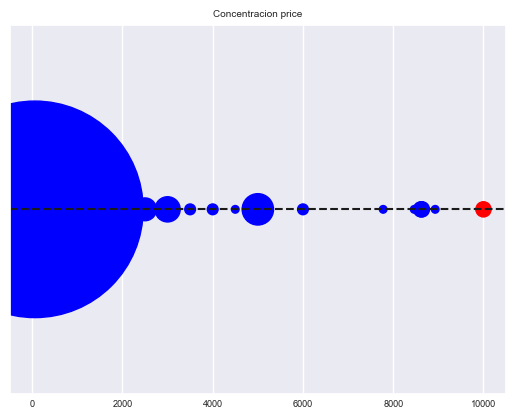

In [37]:
precios = df["price"]
precios_unique, counts = np.unique(precios, return_counts=True)
 
sizes = counts*30
colors = ['blue']*len(precios_unique)
colors[-1] = 'red'
 
plt.axhline(1, color='k', linestyle='--')
plt.scatter(precios_unique, np.ones(len(precios_unique)), s=sizes, color=colors)
plt.yticks([])
plt.tick_params(direction ="in")
plt.title("Concentracion price")
plt.show()

Test Normalidad Shapiro

In [38]:
from scipy.stats import shapiro

In [39]:
test_norm = shapiro(df["price"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.0


c:\Users\fara1\.vscode\Fara Mazza\venv_analytics\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test de correlación Spearman

In [40]:
from scipy.stats import spearmanr

In [41]:
stat, p = spearmanr(df["price"], df["latitude"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.133, p=0.000
Probablemente dependientes


<AxesSubplot: >

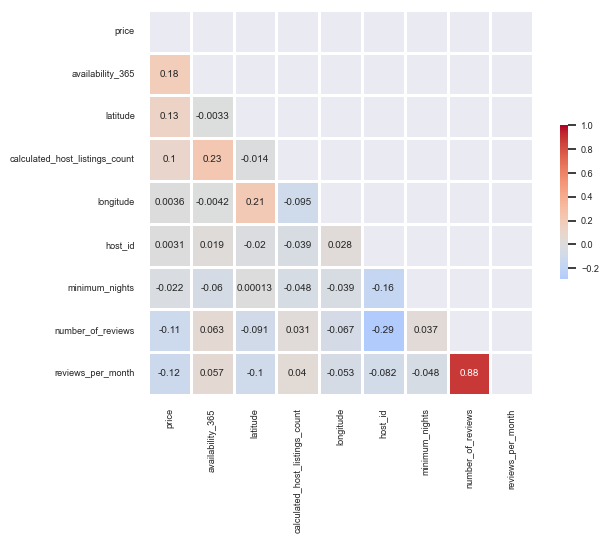

In [42]:
corr = df.corr(method = 'spearman').sort_values(by = 'price', axis = 0, ascending = False).sort_values(by = 'price', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7,5))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:,0:], mask=mask[0:,0:], cmap="coolwarm", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .4}, annot = True)

Test estacionario

In [43]:
from statsmodels.tsa.stattools import adfuller

Prueba de Dickey-Fuller aumentada (ADF)

In [44]:
stat, p, lags, obs, crit, t = adfuller(df["price"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente no estacionaria')
else:
	print('Probablemente estacionaria')

stat=-11.586, p=0.000
Probablemente estacionaria


# 1. Impacto de Airbnb en la vivienda

In [45]:
df.columns

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

oferta
precio en diferentes momentos
disponibilidad
room_type

In [46]:
df["neighbourhood_group"].value_counts()

Centro                   9773
Salamanca                1375
Chamberí                 1331
Arganzuela               1121
Tetuán                    838
Carabanchel               678
Retiro                    665
Latina                    616
Ciudad Lineal             613
Puente de Vallecas        591
Chamartín                 551
Moncloa - Aravaca         542
San Blas - Canillejas     524
Usera                     361
Hortaleza                 332
Fuencarral - El Pardo     300
Villaverde                166
Barajas                   165
Moratalaz                 127
Villa de Vallecas         103
Vicálvaro                  65
Name: neighbourhood_group, dtype: int64

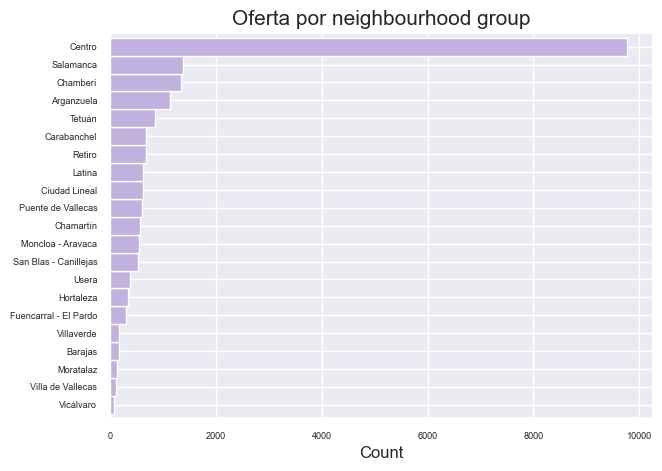

In [47]:
neighbors =df["neighbourhood_group"].value_counts().sort_values(ascending=True)
neighbors.plot.barh(figsize=(7, 5), color = ("#c1b1de"), width=1)
plt.title("Oferta por neighbourhood group", fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.show()

zoom en el centro

In [48]:
dfc = df[df["neighbourhood_group"] == "Centro"]

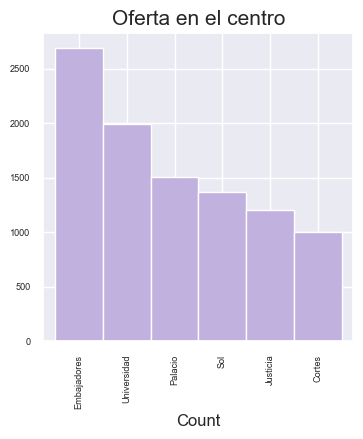

In [49]:
neighc=dfc['neighbourhood'].value_counts().sort_values(ascending=False)
neighc.plot.bar(figsize=(4, 4), color="#c1b1de", width=1) #bar o barh es la orientacion. horizontal o vertical
plt.title("Oferta en el centro", fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.show()

room_type

Text(0.5, 1.0, 'Tipos de habitaciones mas ofertadas')

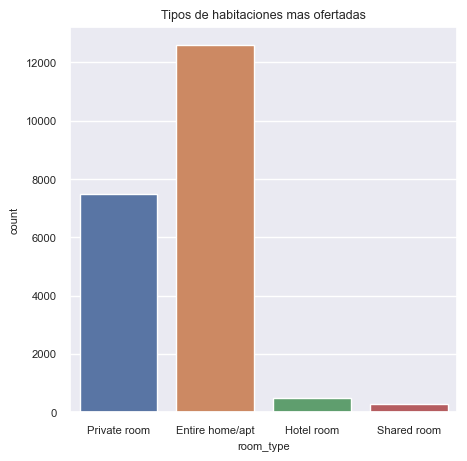

In [50]:
plt.figure(figsize =(5, 5))
plt.xlabel("room_type",fontsize=8)
plt.ylabel("count", fontsize=8)
#to increase y ticks size
plt.yticks(size=8)
#to increase x ticks 
plt.xticks(size=8)
ax = sns.countplot(x="room_type",data=df) 
ax.set_title("Tipos de habitaciones mas ofertadas", fontsize=9)

Oferta por tipo de room

madrid

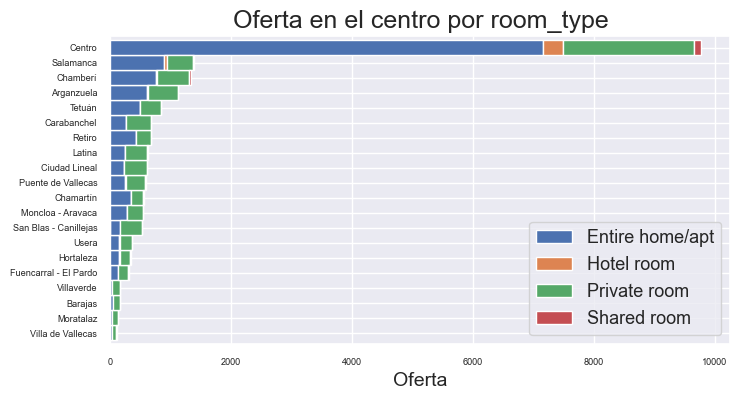

In [51]:
roomtotal = df.groupby(['neighbourhood_group','room_type']).neighbourhood_group.count().sort_values(ascending=False)
roomtotal = roomtotal.unstack()
roomtotal['total'] = roomtotal.iloc[:,:].sum(axis = 1)
roomtotal = roomtotal.sort_values(by=['total'])
roomtotal = roomtotal[roomtotal['total']>=100]
roomtotal = roomtotal.drop(columns=['total'])

roomtotal.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(8,4), width=1)
plt.title('Oferta en el centro por room_type', fontsize=18)
plt.xlabel('Oferta', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

zoom centro

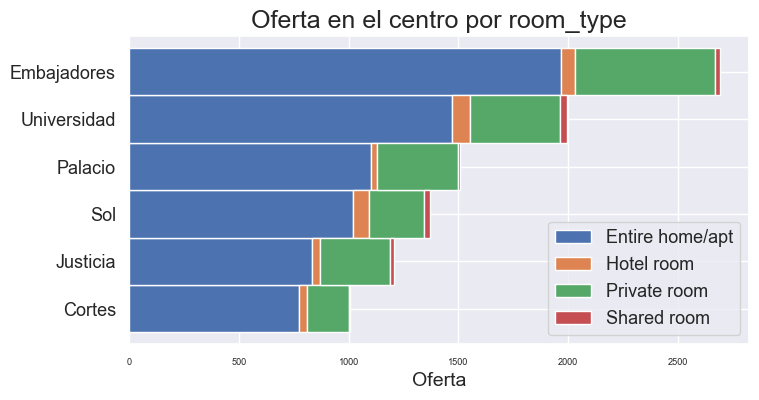

In [52]:
roomc = dfc.groupby(['neighbourhood','room_type']).neighbourhood.count().sort_values(ascending=False)
roomc = roomc.unstack()
roomc['total'] = roomc.iloc[:,:].sum(axis = 1)
roomc = roomc.sort_values(by=['total'])
roomc = roomc[roomc['total']>=100]
roomc = roomc.drop(columns=['total'])

roomc.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(8,4), width=1)
plt.title('Oferta en el centro por room_type', fontsize=18)
plt.xlabel('Oferta', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

Precio medio x nei

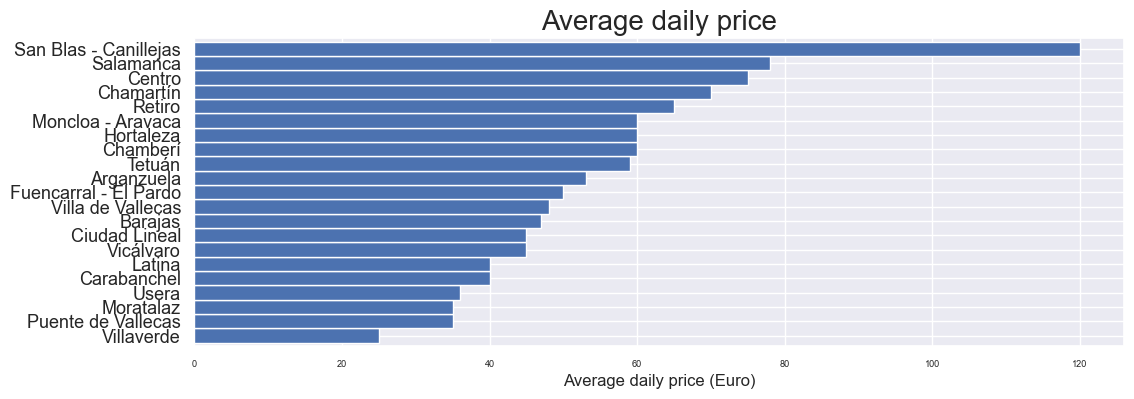

In [53]:
#uso mediana por presencia de outliers
df1 = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=True)
df1.plot.barh(figsize=(12, 4), color='b', width=1)
plt.title("Average daily price", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=12)
plt.ylabel("")
plt.show()

dispo

In [54]:
df["availability_365"].value_counts()

0      4239
365     511
261     223
364     185
90      182
       ... 
197      10
191      10
181       9
209       6
192       6
Name: availability_365, Length: 366, dtype: int64

<AxesSubplot: xlabel='availability_365', ylabel='neighbourhood_group'>

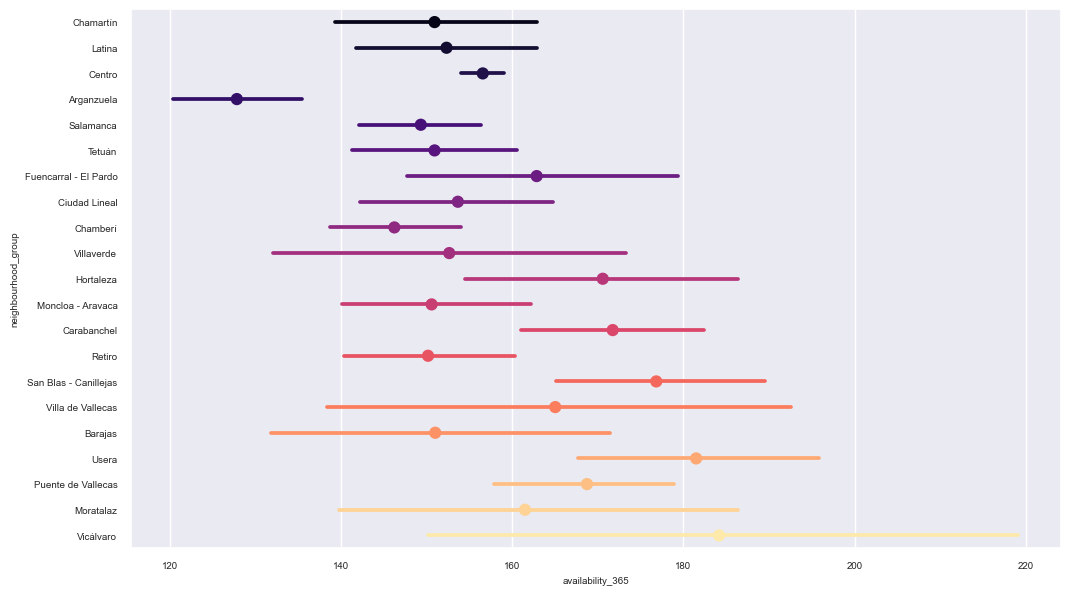

In [55]:
plt.figure(figsize =(12, 7))
plt.xlabel("neighbourhood_group",fontsize=7)
plt.ylabel("availability_365", fontsize=7)
plt.yticks(size=7)
plt.xticks(size=7)
sns.pointplot(df, x="availability_365", y="neighbourhood_group", palette="magma")

In [ ]:
#dispo y precio

In [57]:
df["price"].sort_values()

7757        8
6344        8
12691       9
14652       9
4367        9
         ... 
7573     8930
16853    9999
11801    9999
11804    9999
11799    9999
Name: price, Length: 20837, dtype: int64

<AxesSubplot: xlabel='availability_365', ylabel='price'>

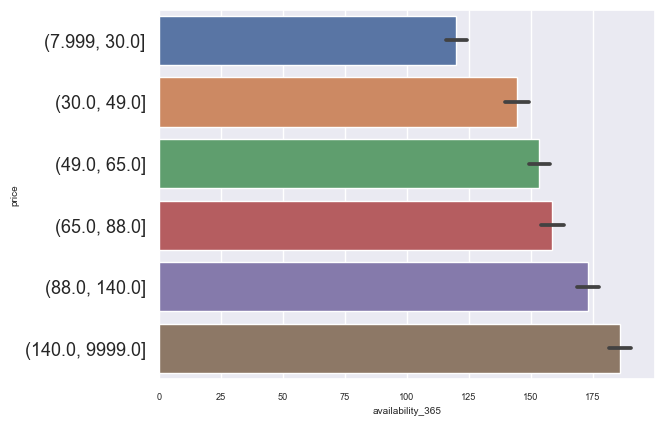

In [58]:
#price por dispo
# Divide price into 6 bins
df["price"] = pd.qcut(df["price"], 6)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ="availability_365", y ="price",
data = df)

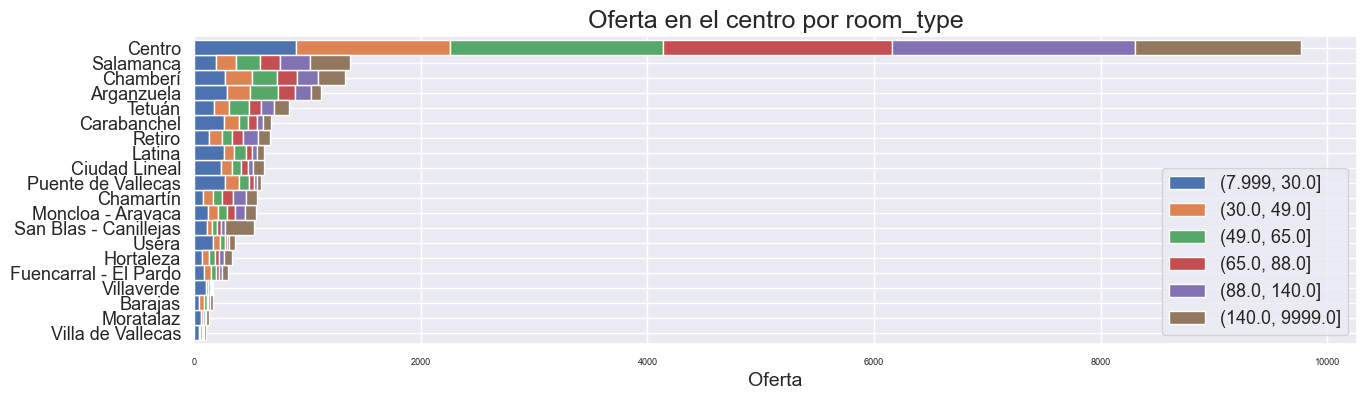

In [59]:
neiprice = df.groupby(['neighbourhood_group','price']).neighbourhood_group.count().sort_values(ascending=False)
neiprice = neiprice.unstack()
neiprice['total'] = neiprice.iloc[:,:].sum(axis = 1)
neiprice = neiprice.sort_values(by=['total'])
neiprice = neiprice[neiprice['total']>=100]
neiprice = neiprice.drop(columns=['total'])

neiprice.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(15,4), width=1)
plt.title('Oferta en el centro por room_type', fontsize=18)
plt.xlabel('Oferta', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

In [60]:
pd.crosstab(index=df["neighbourhood_group"],
            columns=df["price"], margins=True, normalize='index')\
    .round(4)*100 

price,"(7.999, 30.0]","(30.0, 49.0]","(49.0, 65.0]","(65.0, 88.0]","(88.0, 140.0]","(140.0, 9999.0]"
neighbourhood_group,,,,,,
Arganzuela,25.51,18.20,22.21,13.38,12.31,8.39
Barajas,27.27,26.06,13.94,4.85,10.91,16.97
Carabanchel,39.23,18.88,12.39,11.36,7.67,10.47
Centro,9.21,13.87,19.24,20.66,22.00,15.02
Chamartín,13.79,15.43,15.06,17.24,21.05,17.42
Chamberí,20.51,17.58,16.75,13.15,13.97,18.03
Ciudad Lineal,38.66,15.17,13.87,9.62,7.83,14.85
Fuencarral - El Pardo,29.67,18.33,16.33,8.67,9.33,17.67
Hortaleza,21.39,18.37,14.16,11.75,12.35,21.99


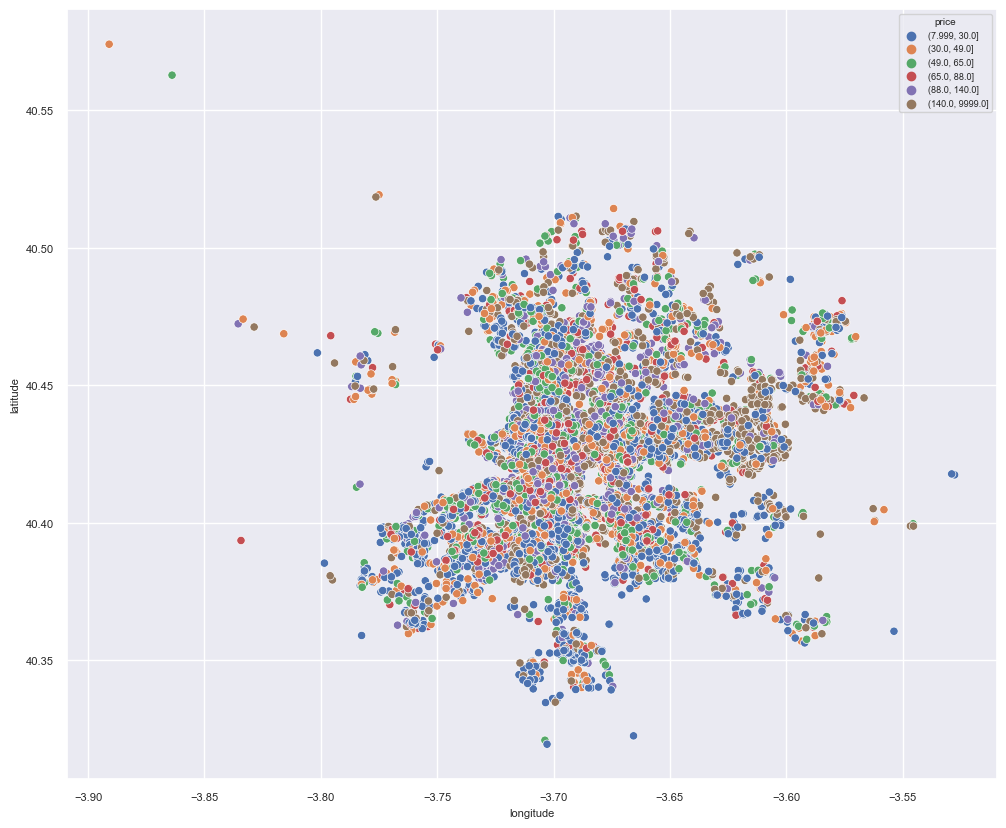

In [61]:
plt.figure(figsize=(12,10))
plt.xlabel("longitude",fontsize=8)
plt.ylabel("latitude", fontsize=8)
plt.yticks(size=8)
plt.xticks(size=8)
sns.scatterplot(data= df , x= "longitude", y="latitude", hue="price")

#increase font size of all elements
sns.set(font_scale=0.9)

In [62]:
df.head(1)

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,"(65.0, 88.0]",1,65,0.56,1,53


In [63]:
df["price"]= df["price"].apply(str)

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

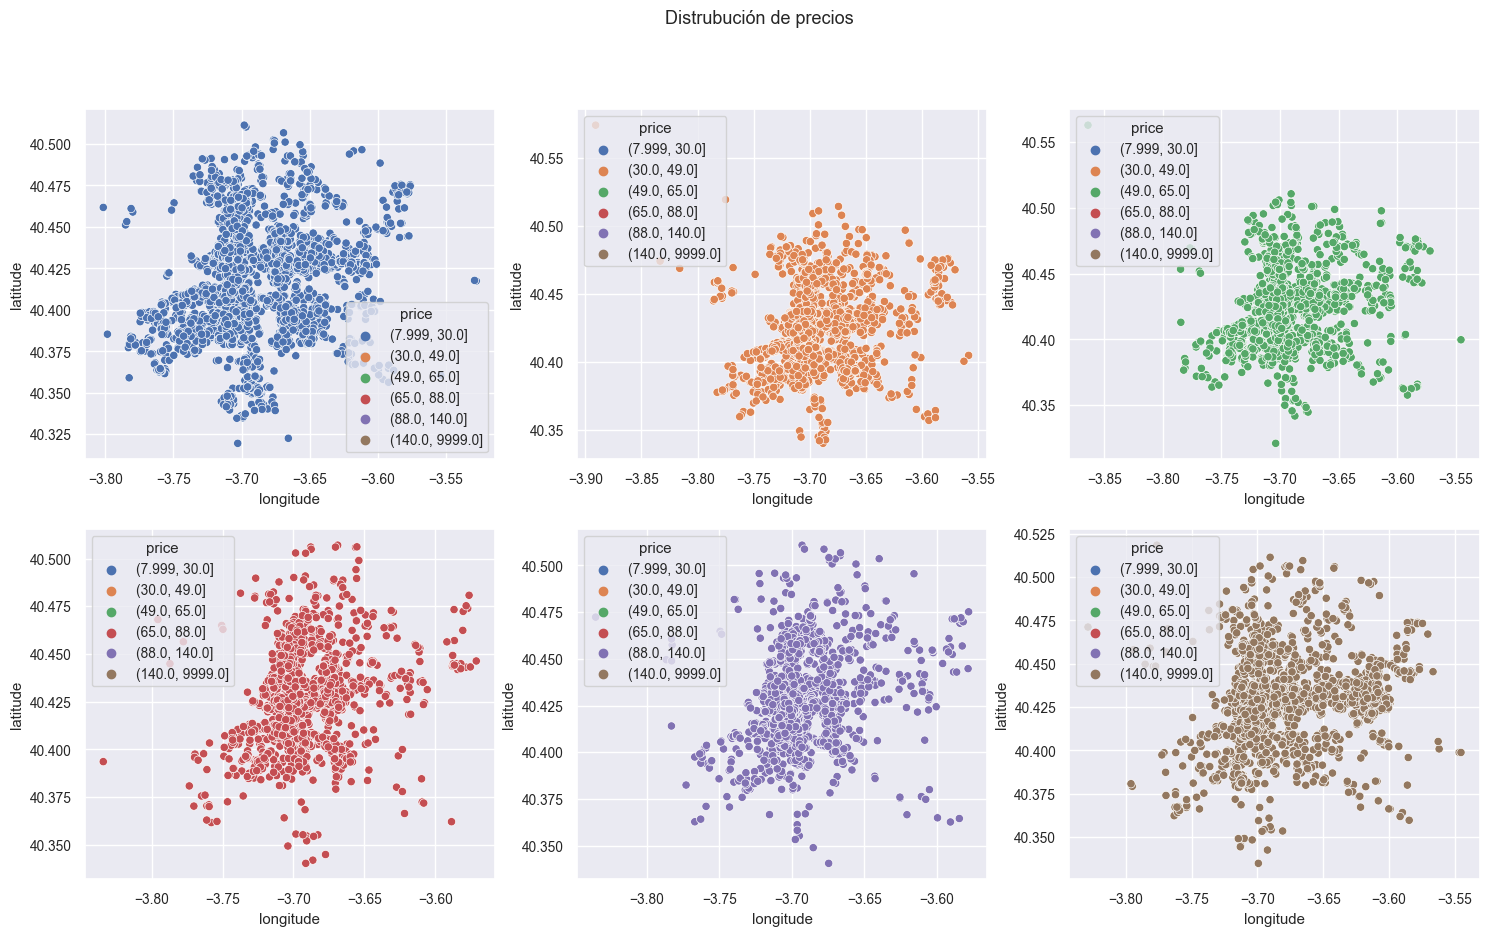

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Distrubución de precios')

sns.scatterplot(ax=axes[0, 0], data=df[df["price"]== "(7.999, 30.0]"], x= "longitude", y="latitude", hue="price")
sns.scatterplot(ax=axes[0, 1], data=df[df["price"]== "(30.0, 49.0]"], x= "longitude", y="latitude", hue="price")
sns.scatterplot(ax=axes[0, 2], data=df[df["price"]== "(49.0, 65.0]"], x= "longitude", y="latitude", hue="price")
sns.scatterplot(ax=axes[1, 0], data=df[df["price"]== "(65.0, 88.0]"], x= "longitude", y="latitude", hue="price")
sns.scatterplot(ax=axes[1, 1], data=df[df["price"]== "(88.0, 140.0]"], x= "longitude", y="latitude", hue="price")
sns.scatterplot(ax=axes[1, 2], data=df[df["price"]== "(140.0, 9999.0]"], x= "longitude", y="latitude", hue="price")

# 2. Quien, cuando y como se alquila

host id
minimun nights
numer of reviews
reviews per month
calculated host listings count
disponibilidad

In [80]:
canthost = df.groupby(["host_name"]).host_name.count().sort_values(ascending=False)
canthost

host_name
Claudia                    279
Carlos                     276
Javier                     255
Juan                       247
Maria                      245
                          ... 
Javier Antonio               1
Javier Arnulfo González      1
Javier Y Ana                 1
Javier Y Andrei              1
Juan Y Cristina              1
Name: host_name, Length: 4017, dtype: int64

In [66]:
#df[df["host_name"] == "Claudia"].value_counts().sum()

In [67]:
df

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Simon,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,"(65.0, 88.0]",1,65,0.56,1,53
1,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,"(7.999, 30.0]",4,33,0.55,2,48
2,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,"(65.0, 88.0]",5,2,0.03,1,354
3,101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,"(88.0, 140.0]",3,64,0.63,1,301
4,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,"(7.999, 30.0]",2,136,1.19,1,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20832,226958922,Cristóbal,Chamartín,Castilla,40.47847,-3.68395,Entire home/apt,"(88.0, 140.0]",1,0,0.00,4,108
20833,178608863,Rostyslav,Puente de Vallecas,Palomeras Sureste,40.38533,-3.63968,Private room,"(7.999, 30.0]",2,0,0.00,4,74
20834,182062359,Jose Maciel,Centro,Universidad,40.42182,-3.70336,Entire home/apt,"(65.0, 88.0]",2,0,0.00,2,196
20835,31425029,Valeska,Centro,Embajadores,40.40896,-3.70107,Entire home/apt,"(30.0, 49.0]",2,0,0.00,1,104


In [68]:
px.scatter(df, x="minimum_nights", y="price", log_x=True,color="room_type", template="plotly")

In [69]:
px.scatter(df, x="minimum_nights", y="price", size_max=40,size= "minimum_nights",template="plotly")

In [70]:
#px.scatter(df, x="minimum_nights", y="price", color="room_type",log_x=True, size="minimum_nights",size_max= 50, template="plotly_dark")

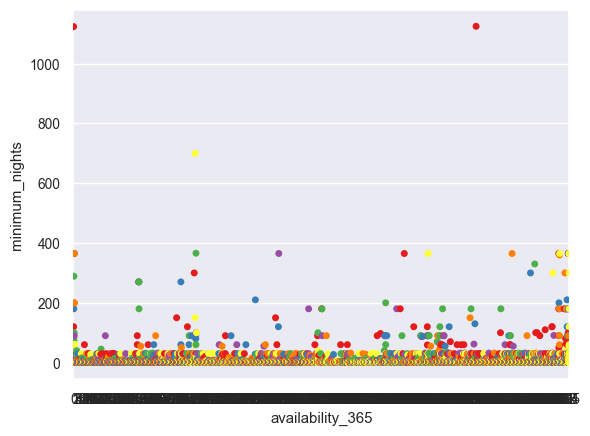

In [72]:
cu=sns.stripplot(x="availability_365", y="minimum_nights", data=df,jitter=True,hue="price", palette='Set1', dodge=True, legend=False)


C:\Users\fara1\AppData\Local\Temp\ipykernel_5576\3607322025.py:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



<AxesSubplot: xlabel='availability_365', ylabel='minimum_nights'>

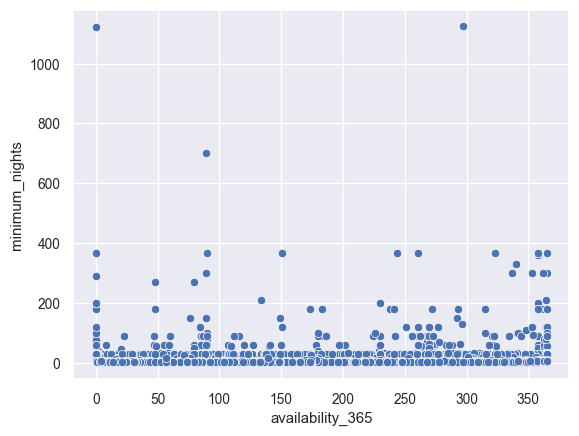

In [73]:
sns.scatterplot(data = df, x="availability_365", y="minimum_nights",palette="deep")

In [74]:
px.box(df, x="minimum_nights", y="availability_365", log_x=True)

<AxesSubplot: >

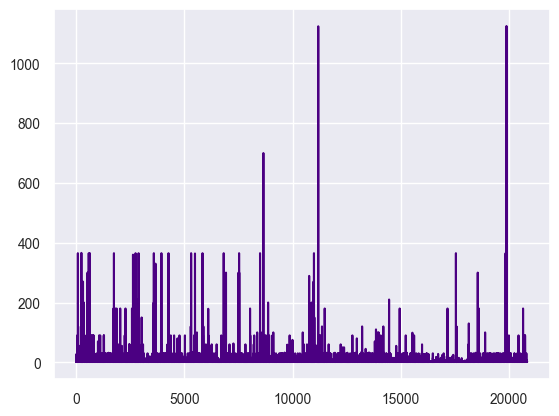

In [75]:
minimo= df["minimum_nights"]
minimo.plot(kind="line", color="indigo")

<AxesSubplot: xlabel='availability_365', ylabel='minimum_nights'>

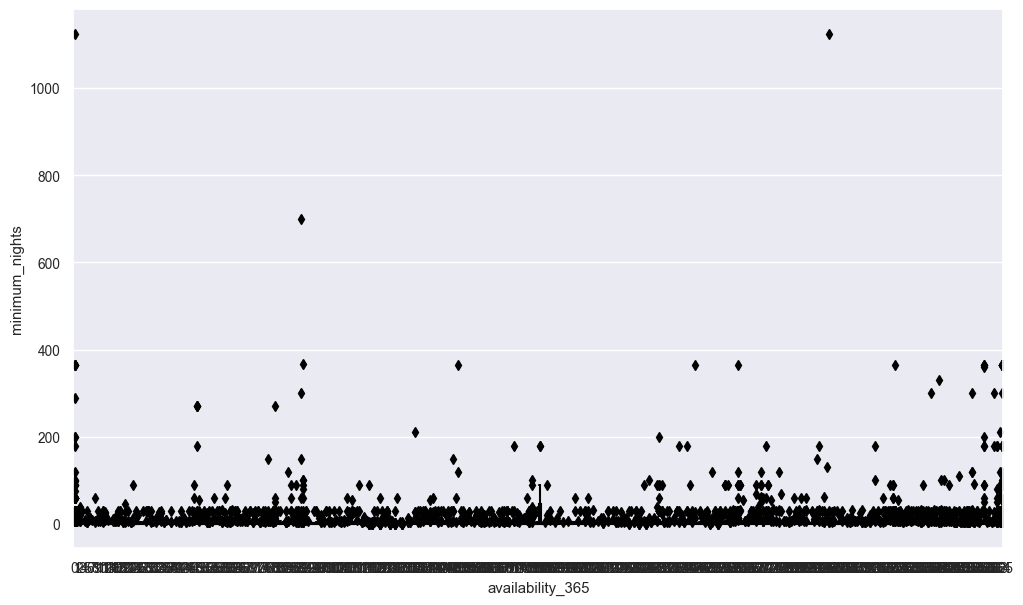

In [76]:
plt.figure(figsize =(12, 7))
sns.boxplot(data= df, x="availability_365", y="minimum_nights", palette="magma")